### T2 - Aprendizado de Máquina
- Cristiano Moreira Martins
- 24290410-0

### Imports, leitura do arquivo

In [26]:

import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('treino.csv')

### Análise exploratória

In [3]:
data

,IDpassageiro,Nome,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,5647_02,Chabih Matoltuble,C,178,P,America,Monaco,52.0,0,0,0.0,1425.0,31.0,0.0,1320.0,1
1,0107_01,Coobix Hart,D,2,S,Africa,Grecia,21.0,0,0,1743.0,5.0,17.0,0.0,0.0,0
2,4158_01,Doryn Noeley,E,273,S,Europa,Grecia,27.0,0,0,0.0,0.0,580.0,211.0,0.0,0
3,1316_01,Sadrus Quelfly,E,95,S,America,Grecia,28.0,0,1,0.0,0.0,0.0,0.0,0.0,1
4,9069_05,Mirfark Taketiatim,B,297,P,America,Monaco,29.0,0,0,0.0,12563.0,0.0,3.0,5057.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,5971_01,Jayrin Kinad,F,1230,P,Africa,Grecia,47.0,0,0,448.0,0.0,891.0,0.0,235.0,0
7120,6135_01,Joanie Ellahan,F,1272,P,Europa,Grecia,24.0,0,0,270.0,0.0,534.0,0.0,0.0,0
7121,1000_01,Alus Harte,D,39,P,Africa,Outros,18.0,0,0,885.0,0.0,32.0,0.0,0.0,0
7122,8701_01,Hammet Rekle,F,1789,P,Africa,Monaco,19.0,0,0,203.0,0.0,172.0,1460.0,151.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDpassageiro   7124 non-null   object 
 1   Nome           7124 non-null   object 
 2   Deck           7124 non-null   object 
 3   NumeroCabine   7124 non-null   int64  
 4   PosicaoCabine  7124 non-null   object 
 5   Procedencia    7124 non-null   object 
 6   Destino        7124 non-null   object 
 7   Idade          7124 non-null   float64
 8   VIP            7124 non-null   int64  
 9   AllInclusive   7124 non-null   int64  
 10  ServicoCabine  7124 non-null   float64
 11  Restaurante    7124 non-null   float64
 12  Shopping       7124 non-null   float64
 13  SPA            7124 non-null   float64
 14  ParquedeAguas  7124 non-null   float64
 15  Sobrevivente   7124 non-null   int64  
dtypes: float64(6), int64(4), object(6)
memory usage: 890.6+ KB


In [5]:
data.describe()

,NumeroCabine,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
count,7124.000000,7124.000000,7124.000000,7124.000000,7124.00000,7124.000000,7124.00000,7124.000000,7124.000000,7124.000000
mean,603.314570,28.709714,0.023582,0.350225,211.90539,451.186272,164.56050,296.767827,302.433605,0.506457
std,514.229314,14.480996,0.151754,0.477074,618.42357,1604.170133,540.36276,1104.861331,1146.269782,0.499993
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,169.000000,19.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,430.000000,27.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,1000.000000,37.000000,0.000000,1.000000,38.00000,64.000000,21.25000,54.000000,41.000000,1.000000
max,1894.000000,79.000000,1.000000,1.000000,9920.00000,29813.000000,12253.00000,22408.000000,20336.000000,1.000000


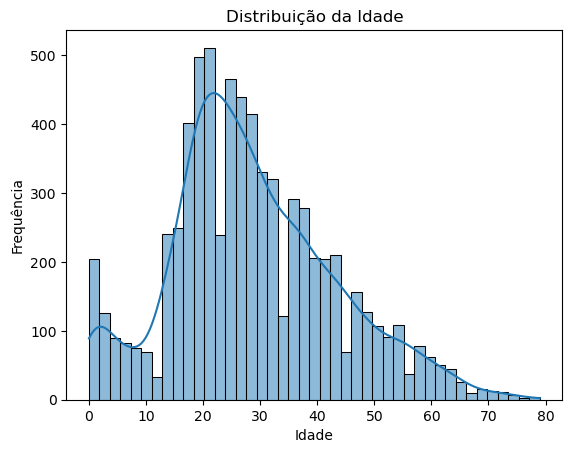

In [6]:
sns.histplot(data['Idade'], kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

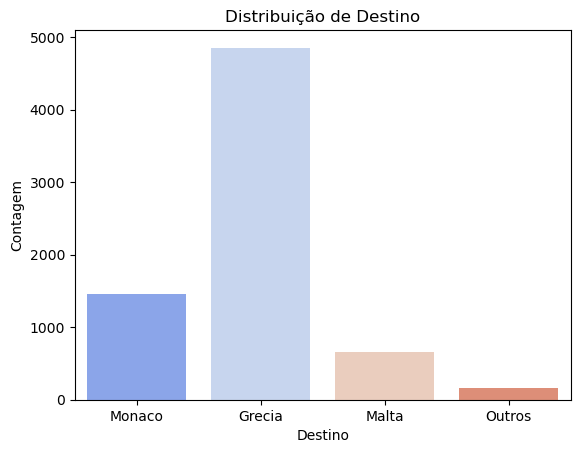

In [7]:
sns.countplot(x='Destino', data=data, palette='coolwarm')
plt.title('Distribuição de Destino')
plt.xlabel('Destino')
plt.ylabel('Contagem')
plt.show()

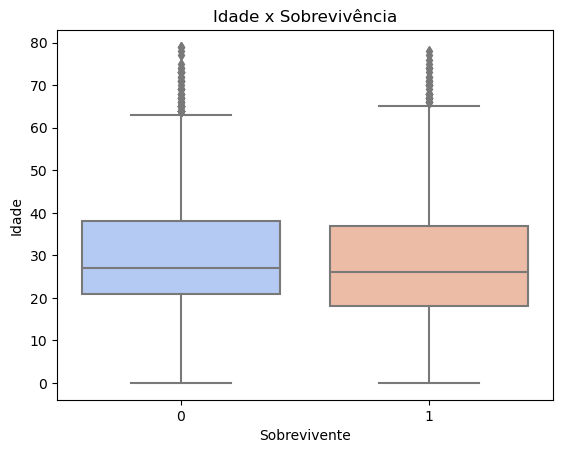

In [8]:
sns.boxplot(x='Sobrevivente', y='Idade', data=data, palette='coolwarm')
plt.title('Idade x Sobrevivência')
plt.xlabel('Sobrevivente')
plt.ylabel('Idade')
plt.show()

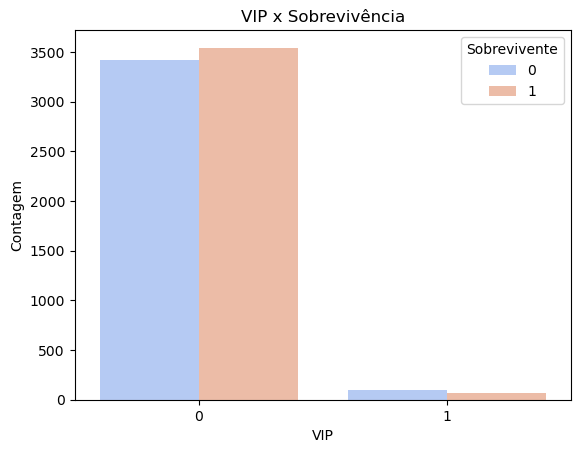

In [9]:
sns.countplot(x='VIP', hue='Sobrevivente', data=data, palette='coolwarm')
plt.title('VIP x Sobrevivência')
plt.xlabel('VIP')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivente', loc='upper right')
plt.show()

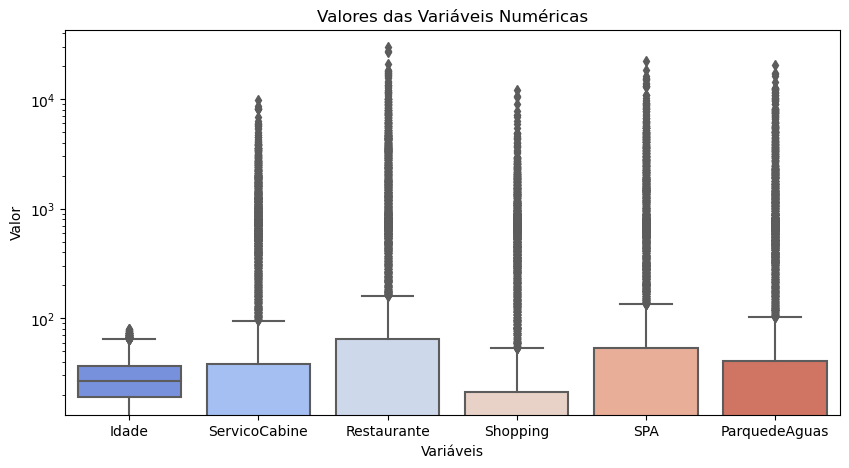

In [10]:
numericas = ['Idade', 'ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']

# Seleciona apenas as colunas numéricas
numerical_data = data[numericas]

melted_data = numerical_data.melt(var_name='Variável', value_name='Valor')

plt.figure(figsize=(10, 5))

sns.boxplot(x='Variável', y='Valor', data=melted_data, showfliers=True, palette='coolwarm')

plt.title('Valores das Variáveis Numéricas')
plt.xlabel('Variáveis')
plt.ylabel('Valor')
plt.yscale('log')
plt.show()

### Preparação dos dados
- Serão utilizados todos os dados do conjunto de treino.
- Foi criada uma função para ajustar os dados que serão utilizados nos classificadores.
- Os dados categóricos são tratados com One-Hot encoding e os dados numéricos foram padronizados. 
- Todos algoritmos irão utilizar os dados no mesmo formato ajustado, mesmo aquele que não necessita de uma transformação nos dados categoricos, por exemplo.

In [ ]:
def prepare_data(data_df):
    '''
    Ajusta os dados para que eles possam ser utilizados nos classificadores
    '''
    numerical_columns = ['Idade', 'ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']
    categorical_columns = ['Deck', 'PosicaoCabine', 'Procedencia', 'Destino']

    # Imputação dados numérico ou categórica
    imputer_num = SimpleImputer(strategy='median')
    data_df[numerical_columns] = imputer_num.fit_transform(data_df[numerical_columns])

    imputer_cat = SimpleImputer(strategy='most_frequent')
    data_df[categorical_columns] = imputer_cat.fit_transform(data_df[categorical_columns])

    all_features = numerical_columns + categorical_columns

    X = data_df[all_features]
    y = data_df['Sobrevivente']

    # One-Hot Encoding
    
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    # Padroniza
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

In [27]:
def prepare_data(data_df):
    '''
    Ajusta os dados para que eles possam ser utilizados nos classificadores
    '''
    # Definição das colunas numéricas e categóricas
    numerical_columns = ['Idade', 'ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']
    categorical_columns = ['Deck', 'PosicaoCabine', 'Procedencia', 'Destino']

    # Pipeline para transformação das colunas numéricas
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Pipeline para transformação das colunas categóricas
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    # Combinação das pipelines usando ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

    # Separação das features e do alvo
    X = data_df[numerical_columns + categorical_columns]
    y = data_df['Sobrevivente']

    # Aplicação das transformações
    X_processed = preprocessor.fit_transform(X)

    return X_processed, y

In [28]:
X_scaled, y = prepare_data(data)

# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)


### Modelagem
- Foram avaliados os algoritmos SVM, KNN, MLP e o LightGBM. 
- Para cada um dos algoritmos, foi realizado um Grid Search para encontrar os melhores parâmetros e ao final, foi criado um ensemble do tipo Voting Classifier com os melhores algoritmos identificados. Assim, o modelo final utiliza os dois melhores algoritmos para construir o classificador final.
- Um conjunto de parâmetros foram selecionados e passados para a fução que faz a otimização utilizando o GridSearch, no entanto as configurações de busca do grid search para cada um dos algorítimos encontra-se comentada em cada uma das células referentes a otimização de parâmetros dos algoritimos. 
- Permaneceram apenas os parâmetros encontrados após a otimização para que a execução fosse mais rápida.
- Todos os parâmetros que foram otimizados são passados para os algoritmos, mesmo nos casos onde o melhor valor encontrado foi o parâmetro com valor default, como por exemplo o kernel rfb para o SVM. 

In [29]:
# guarda todos os modelos
models = {}


In [30]:
def grid_search_model(model, params_grid, scoring, X_train, y_train):

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params_grid,
        cv=5,  # Validação cruzada com 5 folds
        scoring=scoring,
        n_jobs=-1  # todos os núcleos disponíveis
    )

    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:")
    print(grid_search.best_params_)

    print(f"Melhor {scoring}: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

#### Modelo 1 - SVM

In [31]:
'''
param_grid_svm = {
    'C': [0.1, 0.5, 1, 5, 10, 12, 15],
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]
}
'''

# melhores parâmetros encontrados
param_grid_svm = {
    'C': [15],
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'degree': [2]
}

models['svm_model'] = grid_search_model(SVC(probability=True, random_state=42), param_grid_svm, 'accuracy', X_train, y_train)


Melhores hiperparâmetros:
{'C': 15, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor accuracy: 0.7917


#### Modelo 2 - KNN

In [32]:
'''
param_grid_knn = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
'''

# melhores parâmetros encontrados
param_grid_knn = {
    'n_neighbors': [7],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

models['knn_model'] = grid_search_model(KNeighborsClassifier(), param_grid_knn, 'accuracy', X_train, y_train)


Melhores hiperparâmetros:
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Melhor accuracy: 0.7802


#### Modelo 3 - LightGBM

In [33]:
'''
param_grid_lgbm = {
    'num_leaves': [8, 16, 32, 64, 128, 256],
    'max_depth': [-1, 10, 15, 20, 30, 40],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200, 500, 1000],
    'min_child_samples': [10, 20, 30]
}
'''

# melhores parâmetros encontrados
param_grid_lgbm = {
    'num_leaves': [128],
    'max_depth': [20],
    'learning_rate': [0.01],
    'n_estimators': [500],
    'min_child_samples': [20]
}

models['lgbm_model'] = grid_search_model(LGBMClassifier(random_state=42), param_grid_lgbm, 'accuracy', X_train, y_train)


[LightGBM] [Info] Number of positive: 3043, number of negative: 3012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 6055, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502560 -> initscore=0.010240
[LightGBM] [Info] Start training from score 0.010240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

#### Modelo 4 - MLP

In [34]:
'''
param_grid_mlp = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64), (32, 64, 32), (32, 128, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'alpha': [0.0001, 0.001],
    'max_iter':[200, 500, 700]
}
'''

# melhores parâmetros encontrados
param_grid_mlp = {
    'hidden_layer_sizes': [ (32, 32)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'alpha': [0.0001],
    'max_iter':[500]
}

models['mlp_model'] = grid_search_model(MLPClassifier(random_state=42), param_grid_mlp, 'accuracy', X_train, y_train)

Melhores hiperparâmetros:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 32), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Melhor accuracy: 0.7937


### Avaliação
- A avaliação dos modelos é realizada observando as métricas de acurácia, recall, F-score e curva ROC, como solicitado na definição do trabalho.
- Foi criada uma função auxiliar para mostrar as métricas calculadas para cada um dos modelos que foram treinados.
- Os valores das métricas ficaram próximos entre si em cada algorítmo, todos no intervalo de aproximadamente 70%-80%. 
- Apesar da otimização realizada, não foram encontrados parâmetros que apresentassem melhoria no desempenho, sendo o máximo alcançado 78% para a acurácia.
- Os melhores resultados alcançados foram obtidos pelo MLP e o LightGBM e esses dois foram utilizados para a criação do Voting Classifier, que apresentou um resultado um pouco melhor que os dois isoladamente.

In [35]:
def evaluate_model(model, X_test, y_test, model_name):
    
    predictions = model.predict(X_test)
    
    # Calcula as métricas
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    print(f'--- {model_name} ---')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('\nRelatório de Classificação:')
    print(classification_report(y_test, predictions))
    
    # Plotar a curva ROC
    # Alguns modelos podem não ter o método predict_proba
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        # Usar decision_function se disponível
        if hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
            # Converter scores para probabilidades usando sigmoid
            from scipy.special import expit
            y_scores = expit(y_scores)
        else:
            print(f'{model_name} não suporta predict_proba ou decision_function.')
            return
    
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


#### Modelo 1 - SVM

--- SVM ---
Acurácia: 0.7811
Precisão: 0.7971
Recall: 0.7858
F1-Score: 0.7914

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       504
           1       0.80      0.79      0.79       565

    accuracy                           0.78      1069
   macro avg       0.78      0.78      0.78      1069
weighted avg       0.78      0.78      0.78      1069



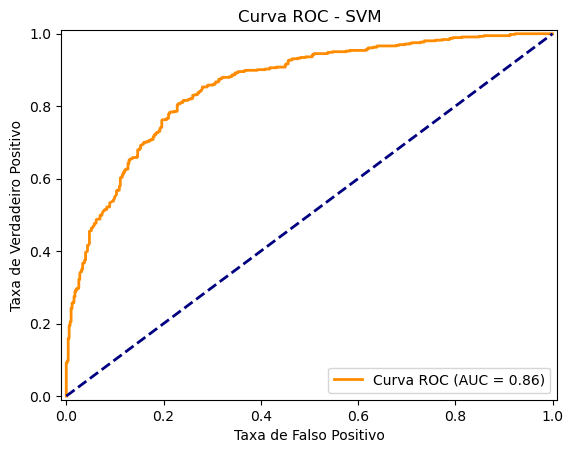

In [36]:
evaluate_model(models['svm_model'], X_test, y_test, 'SVM')

#### Modelo 2 - KNN

--- KNN ---
Acurácia: 0.7297
Precisão: 0.7473
Recall: 0.7381
F1-Score: 0.7427

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       504
           1       0.75      0.74      0.74       565

    accuracy                           0.73      1069
   macro avg       0.73      0.73      0.73      1069
weighted avg       0.73      0.73      0.73      1069



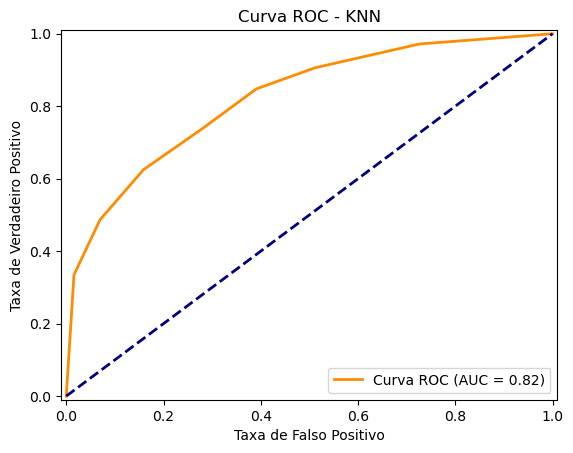

In [37]:
evaluate_model(models['knn_model'], X_test, y_test, 'KNN')

#### Modelo 3 - LightGBM

--- LGBM ---
Acurácia: 0.7839
Precisão: 0.7951
Recall: 0.7965
F1-Score: 0.7958

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       504
           1       0.80      0.80      0.80       565

    accuracy                           0.78      1069
   macro avg       0.78      0.78      0.78      1069
weighted avg       0.78      0.78      0.78      1069



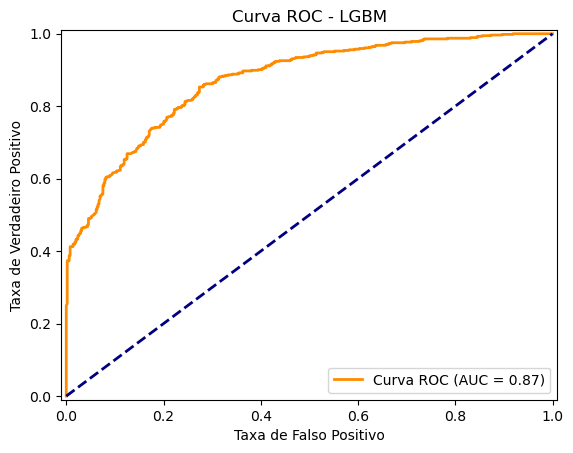

In [38]:
evaluate_model(models['lgbm_model'], X_test, y_test, 'LGBM')

#### Modelo 4 - MLP

--- MLP ---
Acurácia: 0.7783
Precisão: 0.7808
Recall: 0.8071
F1-Score: 0.7937

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       504
           1       0.78      0.81      0.79       565

    accuracy                           0.78      1069
   macro avg       0.78      0.78      0.78      1069
weighted avg       0.78      0.78      0.78      1069



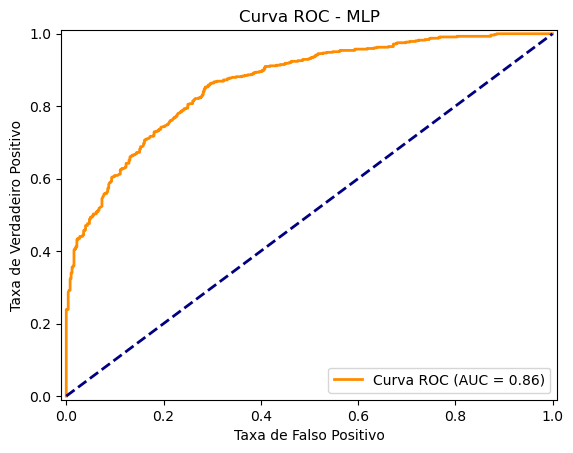

In [39]:
evaluate_model(models['mlp_model'], X_test, y_test, 'MLP')

#### Modelo final - Voting Classifier
Para a criação do classificador, foram escolhidos os modelos que apresentaram os melhores resultados. Como medida de avaliação e critério de escolha, foi utilizada a acurácia e UAC:
- LGBM: 0.78 | UAC: 0.87
- MLP: 0.77 | UAC: 0.87

- Com esses dois algoritmos foi então criado o classificador final que foi capaz de apresentar um resultado um pouco melhor, 0.79 para a acurácia e 0.88 par ao UAC.
- Este classificador é o que será utilizado para a avaliação do arquivo com os dados de teste.

In [40]:
estimators = [
    ('lgbm', models['lgbm_model']), 
    ('mlp', models['mlp_model'])
]

models['voting_clf'] = VotingClassifier(estimators = estimators, voting = 'soft')

models['voting_clf'].fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3043, number of negative: 3012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 6055, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502560 -> initscore=0.010240
[LightGBM] [Info] Start training from score 0.010240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(learning_rate=0.01, max_depth=20,
                                             n_estimators=500, num_leaves=128,
                                             random_state=42)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(32, 32),
                                            max_iter=500, random_state=42))],
                 voting='soft')

--- VotingClassifier ---
Acurácia: 0.7877
Precisão: 0.7944
Recall: 0.8071
F1-Score: 0.8007

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       504
           1       0.79      0.81      0.80       565

    accuracy                           0.79      1069
   macro avg       0.79      0.79      0.79      1069
weighted avg       0.79      0.79      0.79      1069



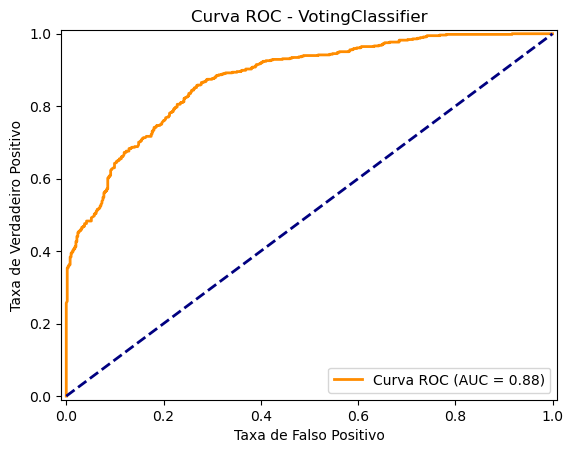

In [41]:
evaluate_model(models['voting_clf'], X_test, y_test, 'VotingClassifier')

### Avaliação - arquivo teste.csv

--- VotingClassifier ---
Acurácia: 0.8672
Precisão: 0.8557
Recall: 0.8875
F1-Score: 0.8713

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3516
           1       0.86      0.89      0.87      3608

    accuracy                           0.87      7124
   macro avg       0.87      0.87      0.87      7124
weighted avg       0.87      0.87      0.87      7124



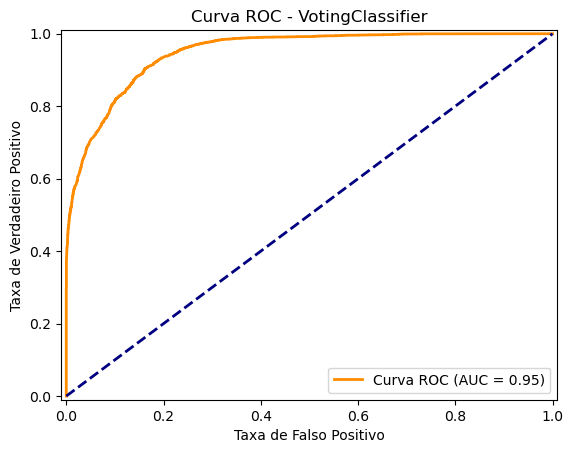

In [42]:
test_data = pd.read_csv('teste.csv')

X_scaled, y = prepare_data(test_data)

evaluate_model(models['voting_clf'], X_scaled, y, 'VotingClassifier')